In [75]:
#Set up
import string
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [5]:
#Read CSV file
stop_word = pd.read_csv("stop_words.csv")
#Create a list to store word
stop_word_list = list(stop_word["word"])

## Without Stop Words 

In [52]:
#Create a function to load text files and convert them to lists
def read_text(address): 
    '''
    This function takes a txt file's directory as input and outputs a list that contains each word of the text.
    
    '''
    #Define punctations to be removed 
    remove_terms = {
    '[':'',
    ']':'',
    '.':'',
    ',':'',
    '(':'',
    ')':'',
    '"':'', 
    "'":'',
    '-':'',
    '?':'',
    '“':'',
    '”':'',
    '1':'',
    '2':'',
    '3':'',
    '4':'',
    '5':'',
    '6':'',
    '7':'',
    '8':'',
    '9':'',
    '0':'',
    ':':'',
    '$':'',
    '£':'',
    '—':''
    }
    text_list = []
    with open(address) as f:
        for line in f:
            text_list.append(line)
    #make the content to lower case, remove all punctuation and split to single word.
    text_list = text_list[0].lower().translate(str.maketrans(remove_terms)).split()
    text_list_no_stop_word = [word for word in text_list if word not in stop_word_list]#remove all the stop words.
    return text_list_no_stop_word

In [51]:
#Create a list for all texts files.
text = ['aljazeera-khashoggi.txt', 'bbc-khashoggi.txt', 'breitbart-khashoggi.txt', 'cnn-khashoggi.txt', 'fox-khashoggi.txt']

['aljazeera-khashoggi.txt',
 'bbc-khashoggi.txt',
 'breitbart-khashoggi.txt',
 'cnn-khashoggi.txt',
 'fox-khashoggi.txt']

In [53]:
#test the function
read_text(text[0])
read_text(text[1])
read_text(text[2])
read_text(text[3])
read_text(text[4])

['saudi',
 'officials',
 'planned',
 'savage',
 'murder',
 'saudi',
 'writer',
 'jamal',
 'khashoggi',
 'days',
 'death',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'tuesday',
 'erdogan',
 'revealed',
 'details',
 'country’s',
 'investigation',
 'khashoggi’s',
 'killing',
 'walked',
 'saudi',
 'consulate',
 'istanbul',
 'oct',
 'contradicting',
 'saudi',
 'arabia’s',
 'explanation',
 'writer',
 'killed',
 'fistfight',
 'erdogan',
 'fell',
 'short',
 'blaming',
 'saudi',
 'crown',
 'prince',
 'mohammed',
 'bin',
 'salman',
 'mention',
 'tape',
 'exists',
 'khashoggis',
 'killing',
 'pressure',
 'kingdom',
 'demands',
 'punishment',
 'people',
 'involved',
 'murder',
 'evidence',
 'gathered',
 'jamal',
 'khashoggi',
 'victim',
 'savage',
 'murder',
 'cover',
 'savagery',
 'hurt',
 'human',
 'conscience',
 'erdogan',
 'saudi',
 'arabia',
 'suspects',
 'detained',
 'columnist’s',
 'killing',
 'turkish',
 'courts',
 'blame',
 'incident',
 'handful',
 'security',
 'intellige

In [54]:
#Create a function to count the number of apperance of each word
def convert_text_to_dtm(txt):
    '''
    This function takes a list that contains each word of the text as input and outputs a dataframe that counts the appearance of each word.
    '''
    d = dict()
    for word in read_text(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [55]:
# Create a function to create a matrix for lists
def gen_DTM(texts=None):
    '''
    This function Generate a document term matrix.
    
    '''
    dtm = pd.DataFrame()#create a new dataframe
    for text in texts:#convert the appearance of words of each file and combine them.
        entry = convert_text_to_dtm(text)
        dtm = dtm.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    dtm.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return dtm

In [56]:
#create arrays for each text
df = gen_DTM(text)
aljazeera_array= df.iloc[0].values
bbc_array= df.iloc[1].values
breitbart_array= df.iloc[2].values
cnn_array= df.iloc[3].values
fox_array= df.iloc[4].values
df

,abdulaziz,absent,accident,accidentally,accidentallyerdogan,account,accounts,accusation,accusing,acknowledged,...,white,widely,withheld,woods,world,worse,writer,yalova,yearold,yelova
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0


In [57]:
#Create a function to calculate the the cosine of two vectors
def cosine(a,b):
    '''
    This function calculate the the cosine of two vectors
    
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))
    return cos

In [80]:
no_stop_words_similarities = {}
#calculate the cosine of each two combinaton
for i in range(gen_DTM(text) .shape[0]):
    for j in range(i + 1, gen_DTM(text).shape[0]):
        no_stop_words_similarities[text[i], text[j]] = cosine(gen_DTM(text).iloc[i].values, gen_DTM(text).iloc[j].values)

In [82]:
no_stop_words_similarities

{('aljazeera-khashoggi.txt', 'bbc-khashoggi.txt'): 0.67921488188034,
 ('aljazeera-khashoggi.txt', 'breitbart-khashoggi.txt'): 0.587746506916122,
 ('aljazeera-khashoggi.txt', 'cnn-khashoggi.txt'): 0.5329904316287792,
 ('aljazeera-khashoggi.txt', 'fox-khashoggi.txt'): 0.6866779664667934,
 ('bbc-khashoggi.txt', 'breitbart-khashoggi.txt'): 0.5829794177702606,
 ('bbc-khashoggi.txt', 'cnn-khashoggi.txt'): 0.5026669355486747,
 ('bbc-khashoggi.txt', 'fox-khashoggi.txt'): 0.6333214014343809,
 ('breitbart-khashoggi.txt', 'cnn-khashoggi.txt'): 0.3683755612287492,
 ('breitbart-khashoggi.txt', 'fox-khashoggi.txt'): 0.5522552937826278,
 ('cnn-khashoggi.txt', 'fox-khashoggi.txt'): 0.5220102651664633}

In [83]:
#Conver the list to dataframe
no_stop_words_similarities=pd.DataFrame(no_stop_words_similarities,index=['0'])
no_stop_words_similarities

aljazeera-khashoggi.txt                                            \
        bbc-khashoggi.txt breitbart-khashoggi.txt cnn-khashoggi.txt   
0                0.679215                0.587747           0.53299   

                          bbc-khashoggi.txt                    \
  fox-khashoggi.txt breitbart-khashoggi.txt cnn-khashoggi.txt   
0          0.686678                0.582979          0.502667   

                    breitbart-khashoggi.txt                    \
  fox-khashoggi.txt       cnn-khashoggi.txt fox-khashoggi.txt   
0          0.633321                0.368376          0.552255   

  cnn-khashoggi.txt  
  fox-khashoggi.txt  
0           0.52201

<AxesSubplot:xlabel='None-None'>

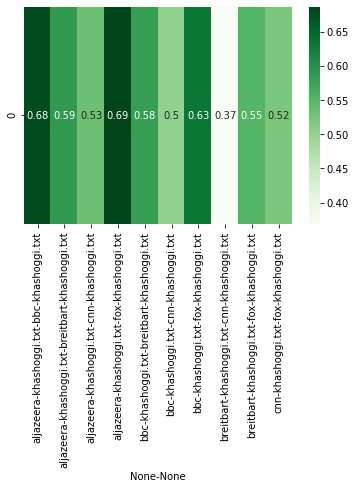

In [77]:
#Create a heatgram to presents similarities for all combinations
sns.heatmap(no_stop_words_similarities, annot=True, cmap = "Greens")

## With Stop Words  

In [84]:
#Create a new function to load text files and convert them to lists
def read_text_new(address): 
    '''
    This function takes a txt file's directory as input and outputs a list that contains each word of the text.
    
    '''
    #Define punctations to be removed 
    remove_terms = {
    '[':'',
    ']':'',
    '.':'',
    ',':'',
    '(':'',
    ')':'',
    '"':'', 
    "'":'',
    '-':'',
    '?':'',
    '“':'',
    '”':'',
    '1':'',
    '2':'',
    '3':'',
    '4':'',
    '5':'',
    '6':'',
    '7':'',
    '8':'',
    '9':'',
    '0':'',
    ':':'',
    '$':'',
    '£':'',
    '—':''
    }
    text_list = []
    with open(address) as f:
        for line in f:
            text_list.append(line)
    #make the content to lower case, remove all punctuation and split to single word.
    text_list = text_list[0].lower().translate(str.maketrans(remove_terms)).split()
    return text_list

In [85]:
read_text_new(text[0])
read_text_new(text[1])
read_text_new(text[2])
read_text_new(text[3])
read_text_new(text[4])

['saudi',
 'officials',
 'planned',
 'the',
 'savage',
 'murder',
 'of',
 'saudi',
 'writer',
 'jamal',
 'khashoggi',
 'days',
 'before',
 'his',
 'death',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'said',
 'tuesday',
 'erdogan',
 'revealed',
 'the',
 'details',
 'of',
 'the',
 'country’s',
 'investigation',
 'into',
 'khashoggi’s',
 'killing',
 'after',
 'he',
 'walked',
 'into',
 'the',
 'saudi',
 'consulate',
 'in',
 'istanbul',
 'on',
 'oct',
 'contradicting',
 'saudi',
 'arabia’s',
 'explanation',
 'that',
 'the',
 'writer',
 'was',
 'killed',
 'in',
 'a',
 'fistfight',
 'erdogan',
 'fell',
 'short',
 'of',
 'blaming',
 'saudi',
 'crown',
 'prince',
 'mohammed',
 'bin',
 'salman',
 'and',
 'made',
 'no',
 'mention',
 'of',
 'whether',
 'a',
 'tape',
 'exists',
 'of',
 'khashoggis',
 'killing',
 'however',
 'he',
 'kept',
 'the',
 'pressure',
 'on',
 'the',
 'kingdom',
 'with',
 'his',
 'demands',
 'for',
 'punishment',
 'of',
 'all',
 'the',
 'people',
 'involved

In [86]:
##Create a bew function to count the number of apperance of each word (includng stop words)
def convert_text_to_dtm_new(txt):
    '''
    This function takes a list that contains each word of the text as input and outputs a dataframe that counts the appearance of each word.
    '''
    d = dict()
    for word in read_text_new(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [87]:
# Create a new function to create a matrix for lists
def gen_DTM_new(texts=None):
    '''
    This function Generate a document term matrix.
    
    '''
    dtm1 = pd.DataFrame()#create a new dataframe
    for text in texts:#convert the appearance of words of each file and combine them.
        entry = convert_text_to_dtm_new(text)
        dtm1 = dtm1.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    dtm1.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return dtm1

In [89]:
df1 = gen_DTM_new(text)
aljazeera_array_new= df1.iloc[0].values
bbc_array_new= df1.iloc[1].values
breitbart_array_new= df1.iloc[2].values
cnn_array_new= df1.iloc[3].values
fox_array_new= df1.iloc[4].values
df1

,a,abdulaziz,able,about,absent,accident,accidentally,accidentallyerdogan,according,account,...,working,world,worse,would,writer,yalova,yearold,yelova,yet,your
0,11,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0
2,11,2.0,0.0,2,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14,0.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,14,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [90]:
#Create a new function to calculate the the cosine of two vectors
def cosine1(a,b):
    '''
    This function calculate the the cosine of two vectors
    
    '''
    cos1 = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))
    return cos1

In [93]:
words_similarities = {}
#calculate the cosine of each two combinaton and append it to the dictionary
for i in range(gen_DTM_new(text) .shape[0]):
    for j in range(i + 1, gen_DTM_new(text).shape[0]):
        words_similarities[text[i], text[j]] = cosine1(gen_DTM_new(text).iloc[i].values, gen_DTM_new(text).iloc[j].values)

In [94]:
words_similarities

{('aljazeera-khashoggi.txt', 'bbc-khashoggi.txt'): 0.8709967205904168,
 ('aljazeera-khashoggi.txt', 'breitbart-khashoggi.txt'): 0.8377327005911074,
 ('aljazeera-khashoggi.txt', 'cnn-khashoggi.txt'): 0.734947408528621,
 ('aljazeera-khashoggi.txt', 'fox-khashoggi.txt'): 0.843407382814606,
 ('bbc-khashoggi.txt', 'breitbart-khashoggi.txt'): 0.8971526212562742,
 ('bbc-khashoggi.txt', 'cnn-khashoggi.txt'): 0.7439547277433648,
 ('bbc-khashoggi.txt', 'fox-khashoggi.txt'): 0.8881336583138009,
 ('breitbart-khashoggi.txt', 'cnn-khashoggi.txt'): 0.6793857155369853,
 ('breitbart-khashoggi.txt', 'fox-khashoggi.txt'): 0.8687435911109992,
 ('cnn-khashoggi.txt', 'fox-khashoggi.txt'): 0.7379487432738744}

In [95]:
#Conver the new list with stop words to dataframe
words_similarities=pd.DataFrame(words_similarities,index=['0'])
words_similarities

aljazeera-khashoggi.txt                                            \
        bbc-khashoggi.txt breitbart-khashoggi.txt cnn-khashoggi.txt   
0                0.870997                0.837733          0.734947   

                          bbc-khashoggi.txt                    \
  fox-khashoggi.txt breitbart-khashoggi.txt cnn-khashoggi.txt   
0          0.843407                0.897153          0.743955   

                    breitbart-khashoggi.txt                    \
  fox-khashoggi.txt       cnn-khashoggi.txt fox-khashoggi.txt   
0          0.888134                0.679386          0.868744   

  cnn-khashoggi.txt  
  fox-khashoggi.txt  
0          0.737949

<AxesSubplot:xlabel='None-None'>

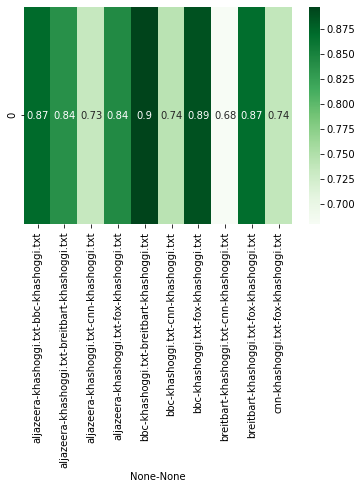

In [97]:
#Generate a new heatgram
sns.heatmap(words_similarities, annot=True, cmap = "Greens")

## Conclusion 

When we only remove punctuations and numbers, leaving stop words in the text, all combinations of texts present greater similarities than excluding stop words. In this case, the bbc/breitbart presents greatest similarity with a consine output of 0.9. However, this value drops to 0.5 after we remove stop words in texts, indicating a significant decrease in similaritiy.

After removing punctuations and numbers, we see an overall decreas in similarities for texts. The aljazeera text has more significant relationship with the bbc text with a value of cosine of 0.68, and the fox news text with a value of cosine of 0.69. This two values decrease from 0.87 and 0.84 relatively when stop words are included. On the other hand, cosine value of 0.37 for texts of bretibart and cnn indicates that this combination has less similarity.